In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from textwrap import wrap
from IPython.display import display
pandas.set_option('display.max_colwidth', None)
pandas.set_option('display.max_rows', None)

In [2]:
immigration2017 = pandas.read_csv("files/2017_Q4_Immigration_Survey_Results.csv", delimiter = ',')
immigration2018 = pandas.read_csv("files/2018_Q2_Immigration_Survey_Results.csv", delimiter = ',')
immigration2019_phone = pandas.read_csv("files/2019_Q1_Immigration_Phone_Survey_Results.csv", delimiter = ',')
immigration2019_online = pandas.read_csv("files/2019_Q1_Immigration_Online_Survey_Results.csv", delimiter = ',')

In [3]:
immigration2017.TABLE = immigration2017.TABLE.replace({' … ':''}, regex=True)
immigration2017.TABLE = immigration2017.TABLE.replace({'^(TABLE)(.{3,5}:)\s+':''}, regex=True)
immigration2017.TABLE = immigration2017.TABLE.replace({'  In general, do you think:':''}, regex=True)
immigration2017.TABLE = immigration2017.TABLE.replace({'Please indicate your level of agreement or disagreement with the following statements. Do you completely agree, mostly agree, mostly disagree, or completely disagree that:  ':''}, regex=True)
immigration2017.TABLE = immigration2017.TABLE.replace({'FIRST MENTION \[ASK IF MOSTLY OR COMPLETELY DISAGREE IN Q.AD2\] ':''}, regex=True)
immigration2017.TABLE = immigration2017.TABLE.replace({'TOTAL MENTIONS \[ASK IF MOSTLY OR COMPLETELY DISAGREE IN Q.AD2\] ':''}, regex=True)
immigration2017.RESPONSE = immigration2017.RESPONSE.replace({'Negative economic impact/burden on economy':'Negative economic impact/Burden on economy'}, regex=True)

immigration2018.TABLE = immigration2018.TABLE.replace({'^(TABLE)(.{3,5}:)\s+':''}, regex=True)
immigration2018.TABLE = immigration2018.TABLE.replace({'Please indicate your level of agreement or disagreement with the following statements. Do you completely agree, mostly agree, mostly disagree or completely disagree that:  ':''}, regex=True)
immigration2018.TABLE = immigration2018.TABLE.replace({'  In general, do you think:':''}, regex=True)
immigration2018.TABLE = immigration2018.TABLE.replace({'FIRST MENTION \[IF \'MOSTLY DISAGREE\' OR \'COMPLETELY DISAGREE\' IN Q.AD2\] ':''}, regex=True)
immigration2018.TABLE = immigration2018.TABLE.replace({'TOTAL MENTIONS \[IF \'MOSTLY DISAGREE\' OR \'COMPLETELY DISAGREE\' IN Q.AD2\] ':''}, regex=True)

immigration2019_phone.TABLE = immigration2019_phone.TABLE.replace({'^(TABLE)(.{3,5}:)\s+':''}, regex=True)
immigration2019_phone.TABLE = immigration2019_phone.TABLE.replace({'  In general, do you think … :':''}, regex=True)
immigration2019_phone.TABLE = immigration2019_phone.TABLE.replace({'Please indicate your level of agreement or disagreement with the following statements. Do you completely agree, mostly agree, mostly disagree or completely disagree that:  ':''}, regex=True)
immigration2019_phone.TABLE = immigration2019_phone.TABLE.replace({'TOTAL MENTIONS \[ASK IF MOSTLY OR COMPLETELY DISAGREE IN AD2g\] ':''}, regex=True)
immigration2019_phone.TABLE = immigration2019_phone.TABLE.replace({'FIRST MENTION \[ASK IF MOSTLY OR COMPLETELY DISAGREE IN AD2g\] ':''}, regex=True)
immigration2019_phone.RESPONSE = immigration2019_phone.RESPONSE.replace({'Don’t know/No answer':'Don\'t know/No answer'}, regex=True)
immigration2019_phone.RESPONSE = immigration2019_phone.RESPONSE.replace({'Negative economic impact/burden on economy':'Negative economic impact/Burden on economy'}, regex=True)

immigration2019_online.TABLE = immigration2019_online.TABLE.replace({'^(TABLE)(.{3,7}:)\s+':''}, regex=True)
immigration2019_online.TABLE = immigration2019_online.TABLE.replace({'  In general, do you think … :':''}, regex=True)
immigration2019_online.TABLE = immigration2019_online.TABLE.replace({'Do you completely agree, mostly agree, mostly disagree or completely disagree that:  ':''}, regex=True)
immigration2019_online.TABLE = immigration2019_online.TABLE.replace({'FIRST MENTION \[ASK IF MOSTLY OR COMPLETELY DISAGREE IN AD2\] ':''}, regex=True)
immigration2019_online.TABLE = immigration2019_online.TABLE.replace({'TOTAL MENTIONS \[ASK IF MOSTLY OR COMPLETELY DISAGREE IN AD2\] ':''}, regex=True)
immigration2019_online.RESPONSE = immigration2019_online.RESPONSE.replace({'Don’t know':'Don’t know/No answer'}, regex=True)
immigration2019_online.RESPONSE = immigration2019_online.RESPONSE.replace({'Don’t know/No answer/No answer':'Don’t know/No answer'}, regex=True)
immigration2019_online.RESPONSE = immigration2019_online.RESPONSE.replace({'Don’t know/No answer':'Don\'t know/No answer'}, regex=True)
immigration2019_online.RESPONSE = immigration2019_online.RESPONSE.replace({'Negative economic impact/burden on economy':'Negative economic impact/Burden on economy'}, regex=True)


In [4]:
# groups = immigration2017["GROUP"].unique()
# groups

mask_onlyNS2017 = immigration2017['GROUP'] == 'NOVA SCOTIA %'
onlyNS_2017 = immigration2017[mask_onlyNS2017]
only_halifax = immigration2017['GROUP'] == 'REGION: Halifax'
immigration2017[only_halifax]

del onlyNS_2017['GROUP WEIGHTED #']
del onlyNS_2017['WEIGHTED SAMPLE SIZE (#)']
del onlyNS_2017['UNWEIGHTED SAMPLE SIZE (#)']

ns2017_group = onlyNS_2017.groupby(['TABLE','RESPONSE']).mean()
ns2017_group = pandas.DataFrame(ns2017_group).reset_index()
questions = ns2017_group["TABLE"].unique()

# fig = plt.figure(figsize=(100, 100))
# i = 0
# for question in questions:
#     indexs = []
#     valuez = []
#     auz = x[x["TABLE"] == question]
#     for index, row in auz.iterrows():
#         indexs.append(row["RESPONSE"])
#         valuez.append(row["GROUP WEIGHTED %"])
#     serie = pandas.Series(valuez, index=indexs)
#     ax = plt.subplot(9,1, i+1)
#     ax.set_title("\n".join(wrap(question, 60)), fontsize=15)
#     ax.pie(serie, autopct='%.2f', textprops={'fontsize': 12})
#     ax.legend(indexs, prop={'size': 12}, loc="best")
#     i+=1
    
#plt.show()

In [5]:
questions2017 = immigration2017.TABLE.unique()
questions2018 = immigration2018.TABLE.unique()
answers2017 = immigration2017.RESPONSE.unique()
answers2018 = immigration2018.RESPONSE.unique()

mask_onlyNS2017 = immigration2017['GROUP'] == 'NOVA SCOTIA %'
onlyNS_2017 = immigration2017[mask_onlyNS2017]
mask_onlyNS2018 = immigration2018['GROUP'] == 'NOVA SCOTIA %'
onlyNS_2018 = immigration2018[mask_onlyNS2018]

df2017 = onlyNS_2017.groupby(['TABLE','RESPONSE']).mean()
df2018 = onlyNS_2018.groupby(['TABLE','RESPONSE']).mean()

df2017 = pandas.DataFrame(df2017).reset_index()
df2018 = pandas.DataFrame(df2018).reset_index()

del df2017['GROUP WEIGHTED #']
del df2017['WEIGHTED SAMPLE SIZE (#)']
del df2017['UNWEIGHTED SAMPLE SIZE (#)']
del df2018['GROUP WEIGHTED #']
del df2018['WEIGHTED SAMPLE SIZE (#)']
del df2018['UNWEIGHTED SAMPLE SIZE (#)']

df2017.rename(columns={'GROUP WEIGHTED %': '2017'}, inplace=True)
df2018.rename(columns={'GROUP WEIGHTED %': '2018'}, inplace=True)

df_2017_2018 = pandas.merge(df2017, df2018, on=['TABLE', 'RESPONSE'], how='outer')
#df_2017_2018


In [6]:
questions2019_on = immigration2019_online.TABLE.unique()
questions2019_ph = immigration2019_phone.TABLE.unique()
answers2019_on = immigration2019_online.RESPONSE.unique()
answers2019_ph = immigration2019_phone.RESPONSE.unique()

mask_onlyNS2019_on = immigration2019_online['GROUP'] == 'NOVA SCOTIA %'
onlyNS_2019_on = immigration2019_online[mask_onlyNS2019_on]

mask_onlyNS2019_ph = immigration2019_phone['GROUP'] == 'NOVA SCOTIA %'
onlyNS_2019_ph = immigration2019_phone[mask_onlyNS2019_ph]

df2019_on = onlyNS_2019_on.groupby(['TABLE','RESPONSE']).mean()
df2019_ph = onlyNS_2019_ph.groupby(['TABLE','RESPONSE']).mean()

df2019_on = pandas.DataFrame(df2019_on).reset_index()
df2019_ph = pandas.DataFrame(df2019_ph).reset_index()

df2019_on.rename(columns={'GROUP WEIGHTED %': '2019 online'}, inplace=True)
df2019_ph.rename(columns={'GROUP WEIGHTED %': '2019 phone'}, inplace=True)


def label_total(row):
    if pandas.isna(row['2019 phone']):
        return row['2019 online']
    
    upper = ( (row['GROUP WEIGHTED #_x'] + row['GROUP WEIGHTED #_y']) * 100 )
    down = row['WEIGHTED SAMPLE SIZE (#)_x'] + row['WEIGHTED SAMPLE SIZE (#)_y']
    return upper/down

immigration2019 = pandas.merge(df2019_on, df2019_ph, on=['TABLE', 'RESPONSE'], how='outer')
immigration2019['2019'] = immigration2019.apply(lambda row: label_total(row), axis=1)

del immigration2019['GROUP WEIGHTED #_x']
del immigration2019['WEIGHTED SAMPLE SIZE (#)_x']
del immigration2019['UNWEIGHTED SAMPLE SIZE (#)_x']
del immigration2019['GROUP WEIGHTED #_y']
del immigration2019['WEIGHTED SAMPLE SIZE (#)_y']
del immigration2019['UNWEIGHTED SAMPLE SIZE (#)_y']

In [7]:
# x = only_ns_df.pivot(index='TABLE', columns='RESPONSE', values='GROUP WEIGHTED %')

In [8]:
df_total = pandas.merge(df_2017_2018, immigration2019, on=['TABLE', 'RESPONSE'], how='outer')
df_total.drop(df_total[df_total.RESPONSE == "None/No others"].index, inplace=True)
df_total

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
0,Having immigrants come to the province makes it a more interesting place,Completely agree,48.356804,47.400615,43.095241,41.028920,42.127409
1,Having immigrants come to the province makes it a more interesting place,Completely disagree,4.892494,3.932599,7.216257,4.329286,5.864045
2,Having immigrants come to the province makes it a more interesting place,Don't know/No answer,2.174338,1.685391,5.339390,0.903203,3.261551
3,Having immigrants come to the province makes it a more interesting place,Mostly agree,35.650861,39.445827,35.361102,45.083309,39.914829
4,Having immigrants come to the province makes it a more interesting place,Mostly disagree,8.925504,7.535568,8.988011,8.655282,8.832166
5,I am interested in learning more about what immigration means for Nova Scotia,Completely agree,26.876305,25.022970,24.825668,23.002969,23.971945
6,I am interested in learning more about what immigration means for Nova Scotia,Completely disagree,8.504341,11.496147,9.877498,8.603883,9.280957
7,I am interested in learning more about what immigration means for Nova Scotia,Don't know/No answer,3.887286,2.589065,4.616089,2.943777,3.832805
8,I am interested in learning more about what immigration means for Nova Scotia,Mostly agree,40.400702,39.312303,42.347087,43.454905,42.865971
9,I am interested in learning more about what immigration means for Nova Scotia,Mostly disagree,20.331365,21.579515,18.333658,21.994466,20.048322


,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
0,Having immigrants come to the province makes it a more interesting place,Completely agree,48.356804,47.400615,43.095241,41.028920,42.127409
1,Having immigrants come to the province makes it a more interesting place,Completely disagree,4.892494,3.932599,7.216257,4.329286,5.864045
2,Having immigrants come to the province makes it a more interesting place,Don't know/No answer,2.174338,1.685391,5.339390,0.903203,3.261551
3,Having immigrants come to the province makes it a more interesting place,Mostly agree,35.650861,39.445827,35.361102,45.083309,39.914829
4,Having immigrants come to the province makes it a more interesting place,Mostly disagree,8.925504,7.535568,8.988011,8.655282,8.832166


<Figure size 432x288 with 0 Axes>

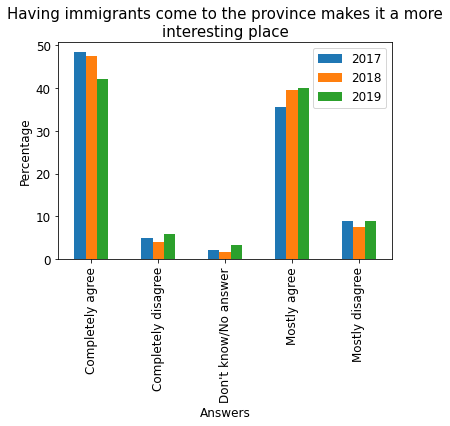

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
5,I am interested in learning more about what immigration means for Nova Scotia,Completely agree,26.876305,25.022970,24.825668,23.002969,23.971945
6,I am interested in learning more about what immigration means for Nova Scotia,Completely disagree,8.504341,11.496147,9.877498,8.603883,9.280957
7,I am interested in learning more about what immigration means for Nova Scotia,Don't know/No answer,3.887286,2.589065,4.616089,2.943777,3.832805
8,I am interested in learning more about what immigration means for Nova Scotia,Mostly agree,40.400702,39.312303,42.347087,43.454905,42.865971
9,I am interested in learning more about what immigration means for Nova Scotia,Mostly disagree,20.331365,21.579515,18.333658,21.994466,20.048322


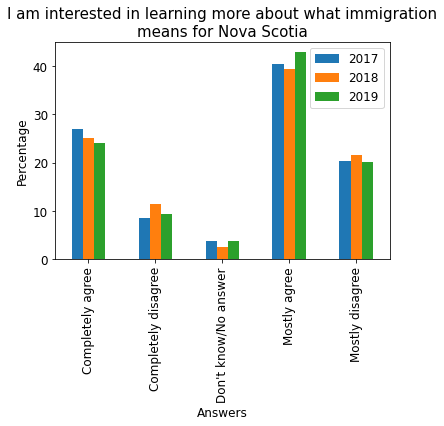

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
10,I personally do not know very much about why immigration is important in our province,Completely agree,8.512011,5.102654,2.742279,9.245926,5.788484
11,I personally do not know very much about why immigration is important in our province,Completely disagree,31.730540,23.654659,35.627653,27.684932,31.907409
12,I personally do not know very much about why immigration is important in our province,Don't know/No answer,4.380999,3.833600,4.379139,1.861920,3.200114
13,I personally do not know very much about why immigration is important in our province,Mostly agree,25.538922,30.856969,20.177193,25.265086,22.560281
14,I personally do not know very much about why immigration is important in our province,Mostly disagree,29.837528,36.552118,37.073736,35.942135,36.543712


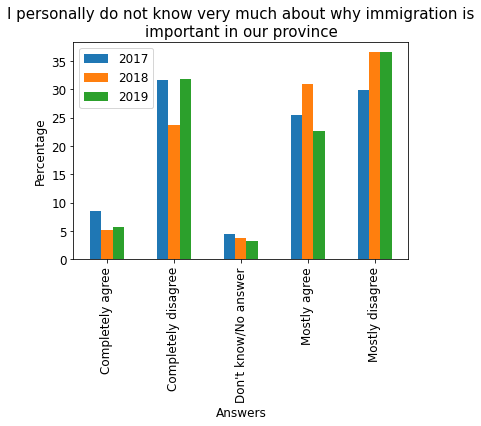

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
15,Immigration is critical to growing the population in Nova Scotia,Completely agree,45.963924,41.490342,41.469962,35.943312,38.881367
16,Immigration is critical to growing the population in Nova Scotia,Completely disagree,4.845482,6.579607,8.609719,9.360621,8.961430
17,Immigration is critical to growing the population in Nova Scotia,Don't know/No answer,1.963435,3.316163,2.292895,1.213872,1.787498
18,Immigration is critical to growing the population in Nova Scotia,Mostly agree,34.348544,36.195237,34.721486,41.801304,38.037560
19,Immigration is critical to growing the population in Nova Scotia,Mostly disagree,12.878614,12.418651,12.905937,11.680890,12.332145


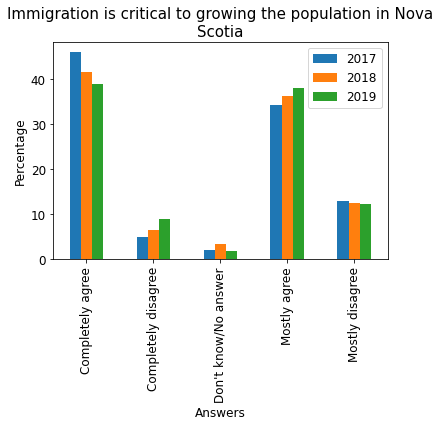

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
20,"Overall, I am personally in favour of immigrants coming to Nova Scotia",Completely agree,47.674954,48.958283,50.392649,46.111618,48.387482
21,"Overall, I am personally in favour of immigrants coming to Nova Scotia",Completely disagree,4.955168,4.354694,5.641407,5.873015,5.749889
22,"Overall, I am personally in favour of immigrants coming to Nova Scotia",Don't know/No answer,2.376530,2.344365,3.250180,2.648170,2.968208
23,"Overall, I am personally in favour of immigrants coming to Nova Scotia",Mostly agree,37.706497,34.899851,31.190656,39.547671,35.104949
24,"Overall, I am personally in favour of immigrants coming to Nova Scotia",Mostly disagree,7.286851,9.442808,9.525107,5.819525,7.789472


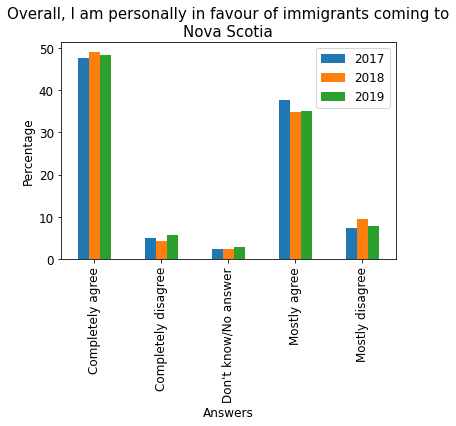

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
25,The province should do more to attract immigrants to Nova Scotia,Completely agree,32.166945,32.476403,34.859285,28.813344,32.027462
26,The province should do more to attract immigrants to Nova Scotia,Completely disagree,7.857772,8.811395,9.507710,8.125121,8.860127
27,The province should do more to attract immigrants to Nova Scotia,Don't know/No answer,5.193219,6.027907,6.182615,2.942852,4.665162
28,The province should do more to attract immigrants to Nova Scotia,Mostly agree,39.186049,37.207443,34.957237,42.192636,38.346183
29,The province should do more to attract immigrants to Nova Scotia,Mostly disagree,15.596015,15.476852,14.493152,17.926047,16.101066


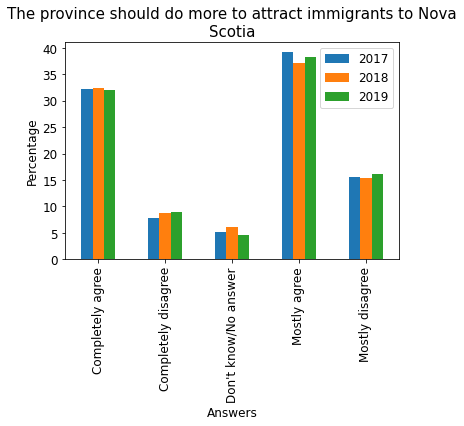

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
30,Which one of the following two statements comes closer to your own thinking about the economic impact of immigration?,Don't know/No answer,7.338194,5.725833,6.402540,5.298935,5.885629
31,Which one of the following two statements comes closer to your own thinking about the economic impact of immigration?,Immigrants serve to increase the number of jobs in the province and thus tend to strengthen the economy overall,65.418747,70.829512,65.980823,71.703281,68.661131
32,Which one of the following two statements comes closer to your own thinking about the economic impact of immigration?,"Immigrants take jobs in the province from existing residents, and thus do not strengthen the economy overall",22.185800,20.221176,17.763465,17.823826,17.791737
33,Which one of the following two statements comes closer to your own thinking about the economic impact of immigration?,Other,5.057259,3.223478,9.853172,5.173958,7.661503


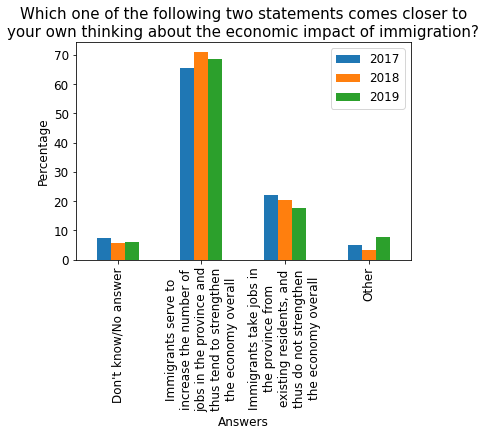

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
34,Why are you not in favour of immigrants coming to Nova Scotia?,Burden on our health care system,4.636259,3.036351,0.891920,NaN,0.891920
35,Why are you not in favour of immigrants coming to Nova Scotia?,Don't know/No answer,4.250687,5.537194,8.069362,8.509426,8.247365
36,Why are you not in favour of immigrants coming to Nova Scotia?,Hard for them to settle in/adjust,7.092772,2.851654,11.041437,10.075376,10.650670
37,Why are you not in favour of immigrants coming to Nova Scotia?,Need to take care of residents first,23.233714,12.541494,26.752530,16.452565,22.586248
38,Why are you not in favour of immigrants coming to Nova Scotia?,Negative economic impact/Burden on economy,18.784878,11.902452,22.498537,12.153635,18.314079
40,Why are you not in favour of immigrants coming to Nova Scotia?,Other,5.154708,10.757978,12.555993,8.200994,10.794419
41,Why are you not in favour of immigrants coming to Nova Scotia?,Takes jobs from residents,32.310814,53.372878,18.190222,44.608004,28.876075


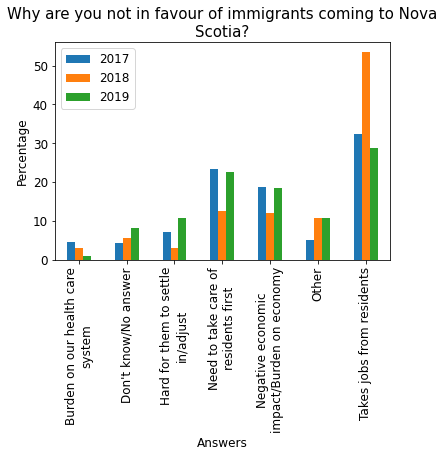

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
42,Why are you not in favour of immigrants coming to Nova Scotia? Any other reasons?,Burden on our education system,1.970352,3.455460,NaN,NaN,NaN
43,Why are you not in favour of immigrants coming to Nova Scotia? Any other reasons?,Burden on our health care system,9.453516,4.938866,6.193249,NaN,6.193249
44,Why are you not in favour of immigrants coming to Nova Scotia? Any other reasons?,Don't know/No answer,4.250687,5.537194,8.069362,8.509426,8.247365
45,Why are you not in favour of immigrants coming to Nova Scotia? Any other reasons?,Hard for them to settle in/adjust,14.038539,10.237499,12.678057,11.491491,12.198097
46,Why are you not in favour of immigrants coming to Nova Scotia? Any other reasons?,Need to take care of residents first,29.881667,22.968049,28.501379,21.509338,25.673135
47,Why are you not in favour of immigrants coming to Nova Scotia? Any other reasons?,Negative economic impact/Burden on economy,30.153331,25.562103,28.691786,23.458181,26.574821
49,Why are you not in favour of immigrants coming to Nova Scotia? Any other reasons?,Other,9.464222,12.431028,12.555993,13.453834,12.919165
50,Why are you not in favour of immigrants coming to Nova Scotia? Any other reasons?,Takes jobs from residents,38.349716,62.801214,19.495981,51.946784,32.622159


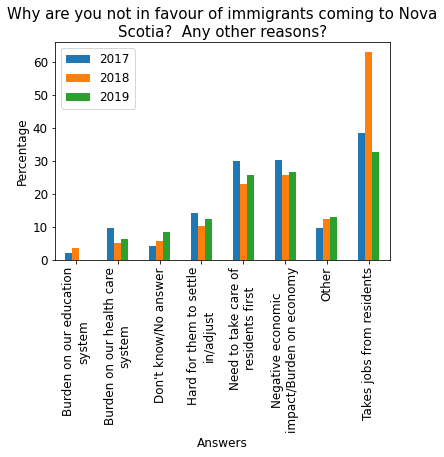

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
51,"Given Nova Scotia's cultural and economic conditions and needs, do you think [THE PRIVATE SECTOR] should be doing more, the same, or less to attract immigrants to the province?",Don't know/No answer,NaN,NaN,7.993098,4.141316,6.188985
52,"Given Nova Scotia's cultural and economic conditions and needs, do you think [THE PRIVATE SECTOR] should be doing more, the same, or less to attract immigrants to the province?",Less,NaN,NaN,12.853814,11.395605,12.170812
53,"Given Nova Scotia's cultural and economic conditions and needs, do you think [THE PRIVATE SECTOR] should be doing more, the same, or less to attract immigrants to the province?",More,NaN,NaN,48.176777,51.010051,49.503837
54,"Given Nova Scotia's cultural and economic conditions and needs, do you think [THE PRIVATE SECTOR] should be doing more, the same, or less to attract immigrants to the province?",The same,NaN,NaN,30.976311,33.453028,32.136366


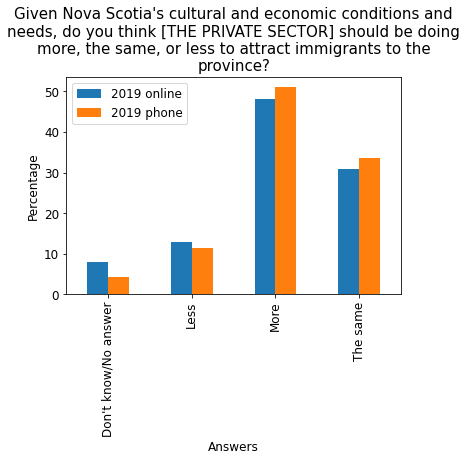

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
55,"Given Nova Scotia's cultural and economic conditions and needs, do you think [THE PROVINCIAL GOVERNMENT] should be doing more, the same, or less to attract immigrants to the province?",Don't know/No answer,NaN,NaN,5.743184,3.029372,4.472078
56,"Given Nova Scotia's cultural and economic conditions and needs, do you think [THE PROVINCIAL GOVERNMENT] should be doing more, the same, or less to attract immigrants to the province?",Less,NaN,NaN,16.868986,12.756215,14.942630
57,"Given Nova Scotia's cultural and economic conditions and needs, do you think [THE PROVINCIAL GOVERNMENT] should be doing more, the same, or less to attract immigrants to the province?",More,NaN,NaN,46.286546,48.663301,47.399780
58,"Given Nova Scotia's cultural and economic conditions and needs, do you think [THE PROVINCIAL GOVERNMENT] should be doing more, the same, or less to attract immigrants to the province?",The same,NaN,NaN,31.101283,35.551113,33.185513


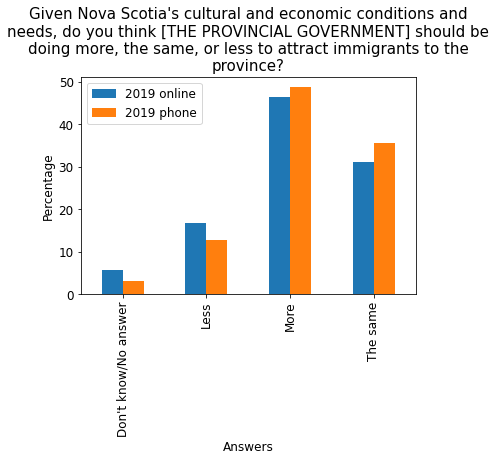

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
59,"Given Nova Scotia's cultural and economic conditions and needs, do you think the province would be best served by having more immigrants from other countries, fewer immigrants, or the same number of immigrants as in recent years?",Don't know/No answer,NaN,NaN,6.638887,3.120916,4.991125
60,"Given Nova Scotia's cultural and economic conditions and needs, do you think the province would be best served by having more immigrants from other countries, fewer immigrants, or the same number of immigrants as in recent years?",Fewer immigrants,NaN,NaN,17.976949,15.283334,16.715303
61,"Given Nova Scotia's cultural and economic conditions and needs, do you think the province would be best served by having more immigrants from other countries, fewer immigrants, or the same number of immigrants as in recent years?",More immigrants,NaN,NaN,44.291873,41.722063,43.088215
62,"Given Nova Scotia's cultural and economic conditions and needs, do you think the province would be best served by having more immigrants from other countries, fewer immigrants, or the same number of immigrants as in recent years?",Same number of immigrants,NaN,NaN,31.092291,39.873687,35.205357


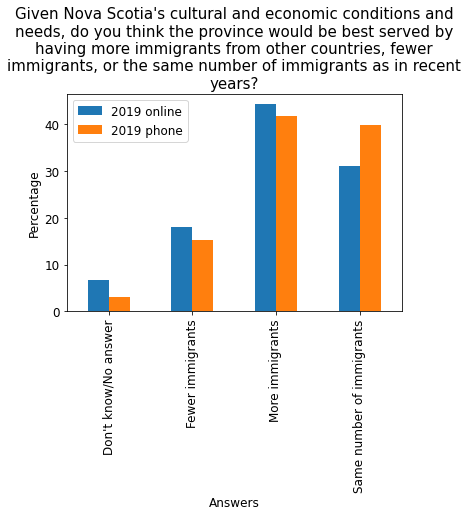

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
63,"How important do you think immigration is to the provincial economy? Is it critically important, important, but not critical, not very important, or not at all important?",Critically important,NaN,NaN,35.029572,33.757528,34.433767
64,"How important do you think immigration is to the provincial economy? Is it critically important, important, but not critical, not very important, or not at all important?",Don't know/No answer,NaN,NaN,1.827218,2.184837,1.994721
65,"How important do you think immigration is to the provincial economy? Is it critically important, important, but not critical, not very important, or not at all important?","Important, but not critical",NaN,NaN,45.404337,48.070441,46.653098
66,"How important do you think immigration is to the provincial economy? Is it critically important, important, but not critical, not very important, or not at all important?",Not at all important,NaN,NaN,5.952850,5.772021,5.868153
67,"How important do you think immigration is to the provincial economy? Is it critically important, important, but not critical, not very important, or not at all important?",Not very important,NaN,NaN,11.786023,10.215173,11.050261


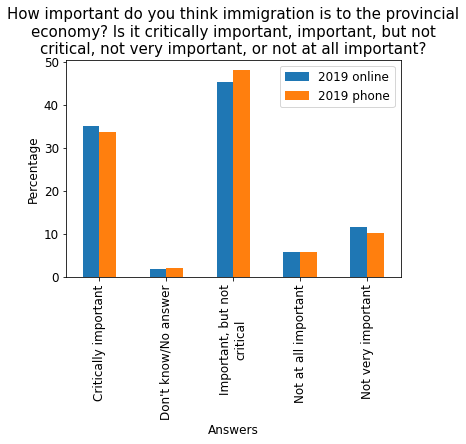

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
68,"In general, compared with other parts of Canada, do you think Nova Scotia is more diverse, less diverse, or neither more nor less diverse in terms of its population and culture?",Don't know/No answer,NaN,NaN,4.593098,1.991193,3.374407
69,"In general, compared with other parts of Canada, do you think Nova Scotia is more diverse, less diverse, or neither more nor less diverse in terms of its population and culture?",Less diverse,NaN,NaN,60.934175,51.753495,56.634091
70,"In general, compared with other parts of Canada, do you think Nova Scotia is more diverse, less diverse, or neither more nor less diverse in terms of its population and culture?",More diverse,NaN,NaN,7.833886,23.381488,15.116135
71,"In general, compared with other parts of Canada, do you think Nova Scotia is more diverse, less diverse, or neither more nor less diverse in terms of its population and culture?",Neither more or less diverse,NaN,NaN,26.638840,22.873824,24.875367


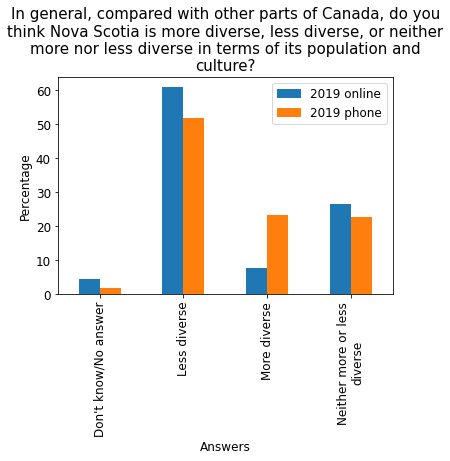

,TABLE,RESPONSE,2017,2018,2019 online,2019 phone,2019
72,It is hard for immigrants to settle in and adjust to coming to Nova Scotia,Completely agree,NaN,NaN,16.025468,19.850701,17.817146
73,It is hard for immigrants to settle in and adjust to coming to Nova Scotia,Completely disagree,NaN,NaN,5.233936,7.494449,6.292724
74,It is hard for immigrants to settle in and adjust to coming to Nova Scotia,Don't know/No answer,NaN,NaN,10.250337,5.676510,8.108030
75,It is hard for immigrants to settle in and adjust to coming to Nova Scotia,Mostly agree,NaN,NaN,45.800272,47.343538,46.523113
76,It is hard for immigrants to settle in and adjust to coming to Nova Scotia,Mostly disagree,NaN,NaN,22.689987,19.634802,21.258987


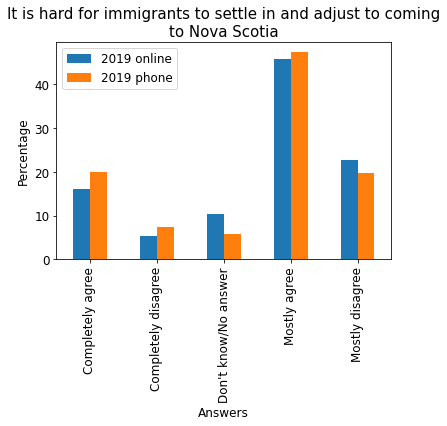

In [9]:
all_questions = df_total["TABLE"].unique()
shared_questions = []
plt.clf()
i = 0
for index, question in enumerate(all_questions):
    if index < 9:
        indexes = ['2017','2018', '2019']
    else:
        shared_questions.append(question)
        indexes = ['2019 online', '2019 phone']

    df_question = df_total[df_total["TABLE"] == question]
    display(df_question)
    answers = ["\n".join(wrap(answer, 25)) for answer in df_question['RESPONSE'].unique()]
    
    ax = df_question[indexes].plot(kind='bar', legend=True, fontsize=12)
    ax.set_title("\n".join(wrap(question, 60)), fontsize=15)
    ax.legend(indexes, prop={'size': 12})
    
    ax.set_xlabel("Answers", fontsize=12)
    ax.set_ylabel("Percentage", fontsize=12)
    ax.set_xticklabels(answers)

#     for p in ax.patches:
#         ax.annotate(numpy.round(p.get_height(),decimals=2), (p.get_x() * 1.005, p.get_height() * 1.005))
    
    i+=1
    plt.show()